#### Nathan Cobb, Helina Mulugeta, Matthew Schultz
#### CSC 3310 141
#### Dr. William S. Retert
#### October 2, 2025

# Program 1: Iterative Algorithms

# Introduction

TODO

## Problem Statement


## Decision Rule



# Imports

In [164]:
import math
import time

import numpy as np
from scipy.stats import linregress

from polygenerator import random_polygon
import matplotlib.pyplot as plt
import pandas as pd
import random

# The Algorithm

## Psuedocode

## Correctness


In [165]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def magnitude(self):
        return math.sqrt(self.x**2 + self.y**2)

class Polygon:
    def __init__(self, points: list[Point]):
        self.points = points

    def __init__(self, points: list[(float, float)]):
        self.points = [Point(pt[0], pt[1]) for pt in points]

    def xs(self):
        return [pt.x for pt in self.points]
    
    def ys(self):
        return [pt.y for pt in self.points]
    
    def as_list(self):
        return [(pt.x, pt.y) for pt in self.points]
    

In [166]:
def check_point(point, polygon):
    left_intersections = 0
    for i in range(len(polygon)):
        p0 = polygon[i]
        p1 = polygon[(i + 1) % len(polygon)]
        if p0.y == p1.y:
            # print(1,polygon[0])
            continue
        if p0.y == point.y and p0.x <= point.x:
            left_intersections += 1
            # print(2,polygon[0])
            if ((polygon[(i-1)%len(polygon)]).y - point.y)*(p1.y-point.y) > 0:
                # print(3, polygon[0])
                left_intersections += 1
            continue

        if min(p0.y, p1.y) < point.y < max(p0.y, p1.y):
            x_intersect = ((point.y - p0.y)*(p0.x - p1.x)/(p0.y-p1.y))+p0.x
            if x_intersect < point.x:
                # print(4, polygon[0])
                left_intersections += 1
    return left_intersections % 2 == 1

# Testing the Algorithm

## Test Case Table

- Describe input, answer expected, and answer obtained
TODO

[(0.20063522842057865, 0.4802241524668917), (0.0, 0.5451574215431852), (0.40800859379424076, 0.11549219106291976), (0.06634216118423848, 0.26824259786150667), (0.4181091902975814, 0.0), (0.6017512315915944, 0.020667920050624924), (0.4869574865002595, 0.08587747708585079), (0.6240250296354937, 0.23910092453729762), (0.8810762814387902, 0.34378230281185124), (1.0, 0.6752109990470142), (0.8699838987797203, 0.958219685040164), (0.12780878255608383, 1.0), (0.7483345368623888, 0.96123596023474), (0.6991233768695722, 0.8443365382367266), (0.4756382333292122, 0.7281994061929964), (0.24009283297479966, 0.7704495785278698), (0.3436165440520272, 0.615495207751133), (0.42013262380917427, 0.6087023537014365), (0.6511019299173638, 0.40872932972412573), (0.3543878768152236, 0.6000047805866732)]


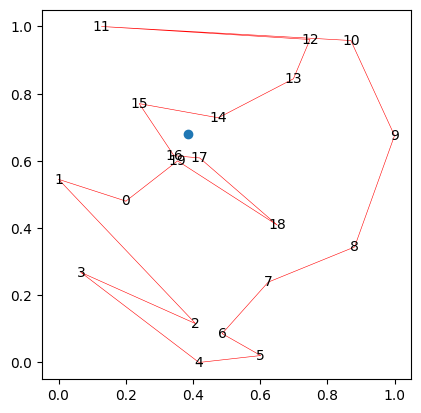

In [167]:
# Referenced: https://pypi.org/project/polygenerator/
def plot_polygon(point: Point, polygon):
    plt.figure()
    plt.gca().set_aspect("equal")

    for i, pt in enumerate(polygon.as_list()):
        plt.text(pt[0], pt[1], str(i), horizontalalignment="center", verticalalignment="center")

    # just so that it is plotted as closed polygon
    polygon.points.append(polygon.points[0])

    plt.plot(polygon.xs(), polygon.ys(), "r-", linewidth=0.4)
    plt.scatter(point.x, point.y)
    plt.show()

polygon = Polygon(random_polygon(num_points=20))

print(polygon.as_list())

plot_polygon(Point(random.random(),random.random()), polygon)

In [168]:
def generate_point_polygon_pairs(base: int, add: int, rep: int, num: int):
    '''
    Generates num point polygon pairs that have a starting number of sides
    of base and go up by add with rep number of pairs that have the same 
    number of sides

    Args:
        base (int): the initial number of sides for the polygon. Has to be >= 3, will default to 3 otherwise
        add (int): how many sides to add for each polygon going up
        rep (int): how many times the same number of sides polygon should be generated
        num (int): how many polygons to generate

    Returns: 
        list: list of (point, polygon) tuples
    '''
    if base < 3:
        base = 3

    out_list = []
    rep_count = 0

    while len(out_list) < num:
        polygon = Polygon(random_polygon(num_points=base))
        point = Point(random.random(),random.random())
        out_list.append((point, polygon))
        rep_count += 1

        if rep_count == rep:
            base += add
            rep_count = 0

    return out_list
    

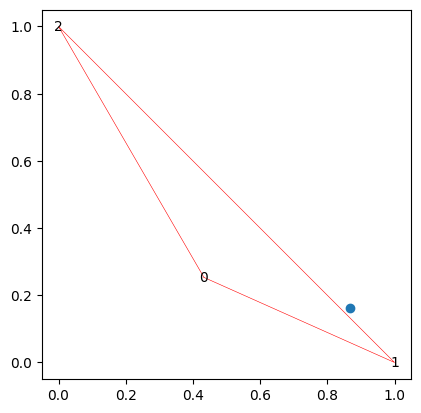

False


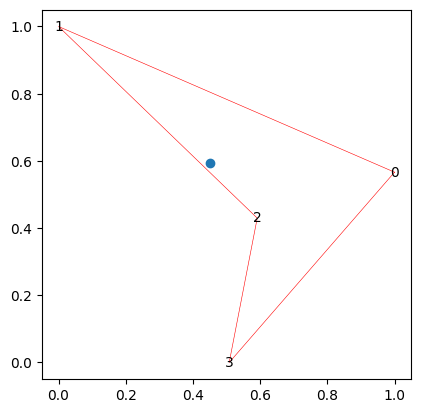

True


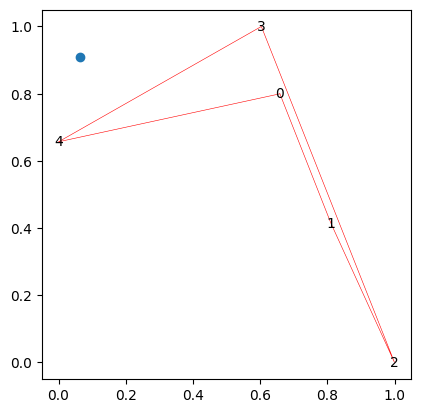

False


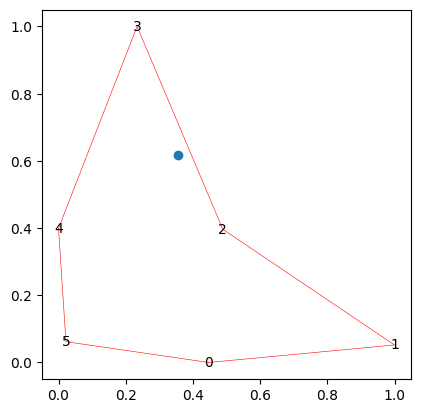

True


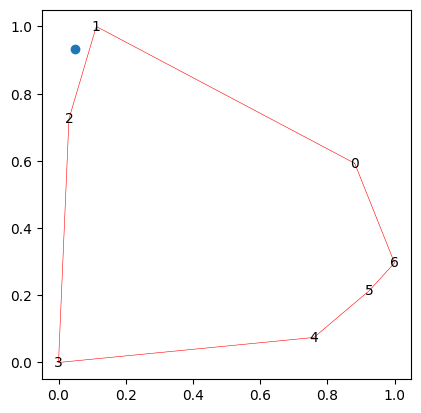

False


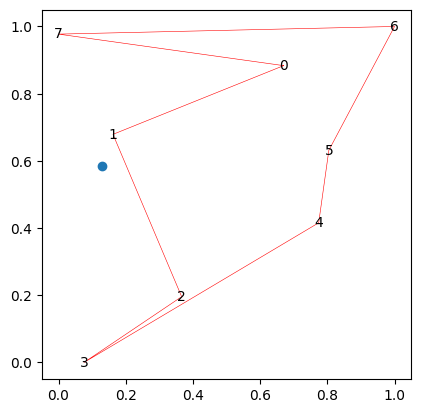

False


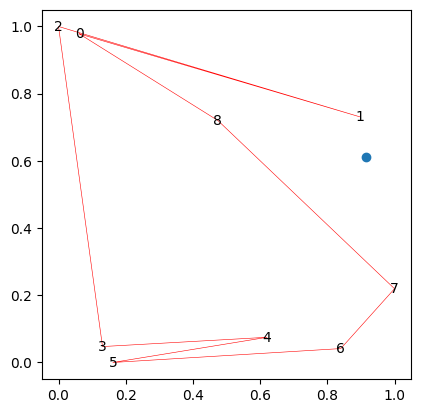

False


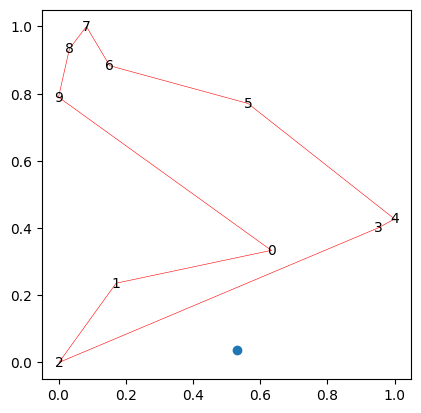

False


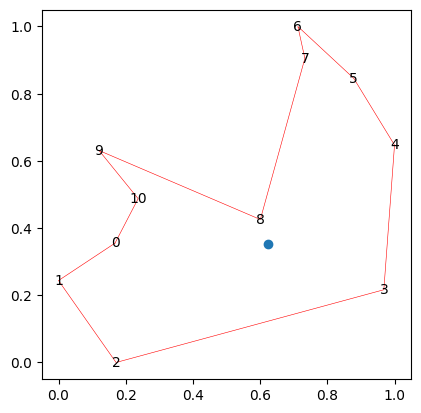

True


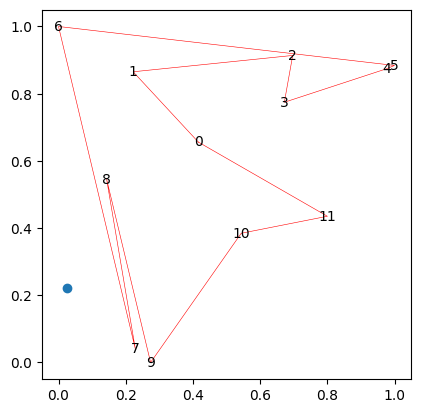

False


In [169]:
paris = generate_point_polygon_pairs(3, 1, 1, 10)

for (point, polygon) in paris:
    plot_polygon(point, polygon)
    print(check_point(point, polygon.points))

In [170]:
assert(check_point(Point(2,2), [Point(1,9),Point(8,3),Point(0,-6),Point(-4,2)]))
# TODO: MORE TESTS
# NOTE: Consider writing the tests outside of the notebook and just calling it here

# Benchmarking

In [171]:
def benchmark(algorithm, point, polygon):
    '''
        takes a the algorithm to solve the problem, a point and
        a polygon to use for running it.

        TODO: Should I be making a copy of either input?

        Returns: 
            float: the time elapsed in seconds
    '''
    start_time = time.perf_counter()
    algorithm(point, polygon)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

In [174]:
pairs = generate_point_polygon_pairs(5, 10, 1, 20)

# results are recorded as (polygon sides, time taken)
results = {
    "num_sides" : [],
    "run_time" : []
}

for point, polygon in pairs:
    results["num_sides"].append(len(polygon.points))
    results["run_time"].append(benchmark(check_point, point, polygon.points))

resutls_df = pd.DataFrame(results)
resutls_df.head()

,num_sides,run_time
0,5,0.000024
1,15,0.000013
2,25,0.000018
3,35,0.000023
4,45,0.000029


Text(0, 0.5, 'Run Time(s)')

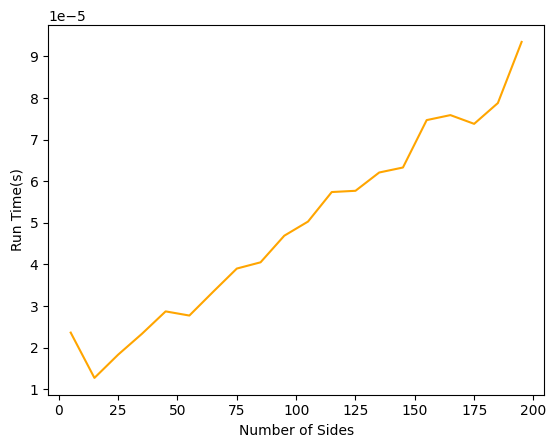

In [175]:
plt.plot(results["num_sides"], results["run_time"], color="orange")

plt.xlabel("Number of Sides")
plt.ylabel("Run Time(s)")

In [176]:
m, b, _, _, _ = linregress(np.log(resutls_df.num_sides), np.log(resutls_df.run_time))
m # implies linear time

np.float64(0.5135884247023224)